<a href="https://colab.research.google.com/github/SaraGul0111/SaraGul/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HEART ATTACK PREDICTION

This notebook aims to predict the likelihood of a heart attack using various machine learning models. The dataset used for this project contains several features related to heart health. We will explore, preprocess, and train different models, then evaluate their performance to find the best one.


## Import Libraries

First, we import the necessary libraries for data manipulation, visualization, and machine learning.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


**Load the Dataset**

load the dataset and take a quick look at the first few rows.

In [40]:
data = pd.read_csv("heart.csv")

In [41]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Define categorical and continuous columns**

In [42]:
cat_cols = ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']
con_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
target_col = 'target'

Print column information

In [43]:
print("The categorial cols are: ", cat_cols)

The categorial cols are:  ['sex', 'exang', 'ca', 'cp', 'fbs', 'restecg', 'slope', 'thal']


In [44]:
print("The continuous cols are: ", con_cols)

The continuous cols are:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [45]:
print("The target variable is: ", target_col)

The target variable is:  target


## Data Visualization

**PAIRPLOT**

Use a pairplot to visualize the pairwise relationships between continuous features.

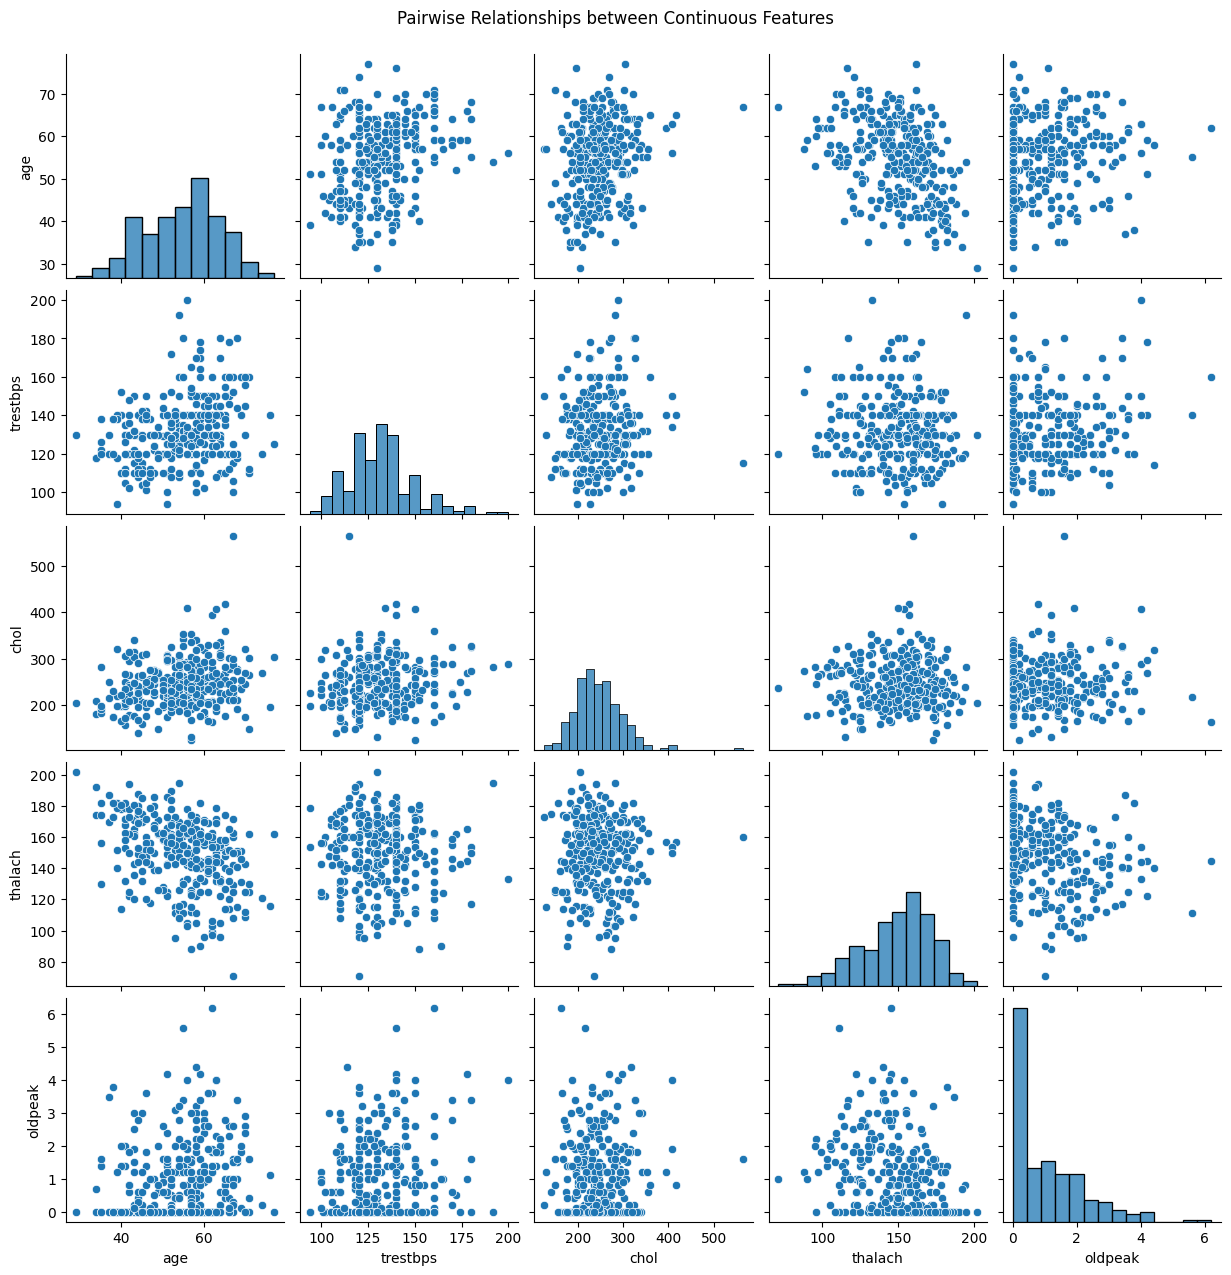

In [46]:
# Pairplot visualization
sns.pairplot(data[con_cols])
plt.suptitle("Pairwise Relationships between Continuous Features", y=1.02)
plt.show()


**Handling missing values and removing duplicates**

In [47]:
data.dropna(inplace=True)

In [48]:
data.drop_duplicates(inplace=True)

**Correlation matrix of continuous features**

In [49]:
print(data[con_cols].dtypes)

age           int64
trestbps      int64
chol          int64
thalach       int64
oldpeak     float64
dtype: object


In [50]:
data_corr = data[con_cols].corr().transpose()
print(data_corr)

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.283121  0.207216 -0.395235  0.206040
trestbps  0.283121  1.000000  0.125256 -0.048023  0.194600
chol      0.207216  0.125256  1.000000 -0.005308  0.050086
thalach  -0.395235 -0.048023 -0.005308  1.000000 -0.342201
oldpeak   0.206040  0.194600  0.050086 -0.342201  1.000000


**Visualize correlation matrix**

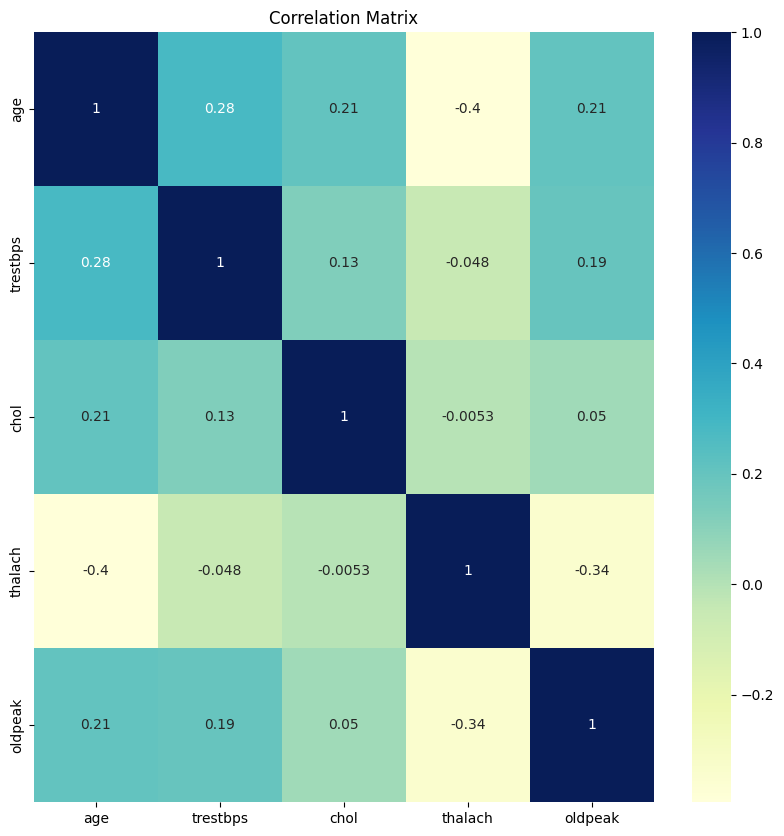

In [51]:
data_corr = data[con_cols].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data_corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

##Feature Selection

In [52]:
X = data.drop(target_col, axis=1)
y = data[target_col]

Calculate correlation-based feature ranking

In [53]:
# Calculate correlation coefficients for each feature
correlation_scores = np.abs(X.corrwith(y))


In [54]:
variances = np.var(X, axis=0)
feature_scores = 0.7 * correlation_scores + 0.3 * variances
ranked_features = feature_scores.sort_values(ascending=False).index
selected_features = ranked_features[:7]

Select features

In [55]:
X_selected = X[selected_features]

In [56]:
print(X_selected)

     chol  thalach  trestbps  age  oldpeak  cp  ca
0     233      150       145   63      2.3   3   0
1     250      187       130   37      3.5   2   0
2     204      172       130   41      1.4   1   0
3     236      178       120   56      0.8   1   0
4     354      163       120   57      0.6   0   0
..    ...      ...       ...  ...      ...  ..  ..
298   241      123       140   57      0.2   0   0
299   264      132       110   45      1.2   3   0
300   193      141       144   68      3.4   0   2
301   131      115       130   57      1.2   0   1
302   236      174       130   57      0.0   1   1

[302 rows x 7 columns]


**Data preprocessing**

In [57]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_selected)

**Split data into train and test sets**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

##Model Training and Evaluation

We train and evaluate several machine learning models, including SVM, Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting.

**1- Support Vector Machine (SVM)**

In [59]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

In [60]:
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

SVM:
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375


**2- Logistic Regression**

In [61]:
logreg = LogisticRegression().fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))


Logistic Regression:
Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.8125
F1 Score: 0.8253968253968254


**3- Decision Tree**

In [63]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [64]:
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.8032786885245902
Precision: 0.8846153846153846
Recall: 0.71875
F1 Score: 0.7931034482758621


**4- Random Forest**

In [65]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [66]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 Score: 0.875


**5- Gradient Boosting**

In [67]:
gbt = GradientBoostingClassifier(n_estimators=300, max_depth=1, subsample=0.8, max_features=0.2, random_state=42)
gbt.fit(X_train, y_train)
y_pred_gbt = gbt.predict(X_test)

In [68]:
print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbt))
print("Precision:", precision_score(y_test, y_pred_gbt))
print("Recall:", recall_score(y_test, y_pred_gbt))
print("F1 Score:", f1_score(y_test, y_pred_gbt))


Gradient Boosting:
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1 Score: 0.870967741935484


## Comparison of Different Models

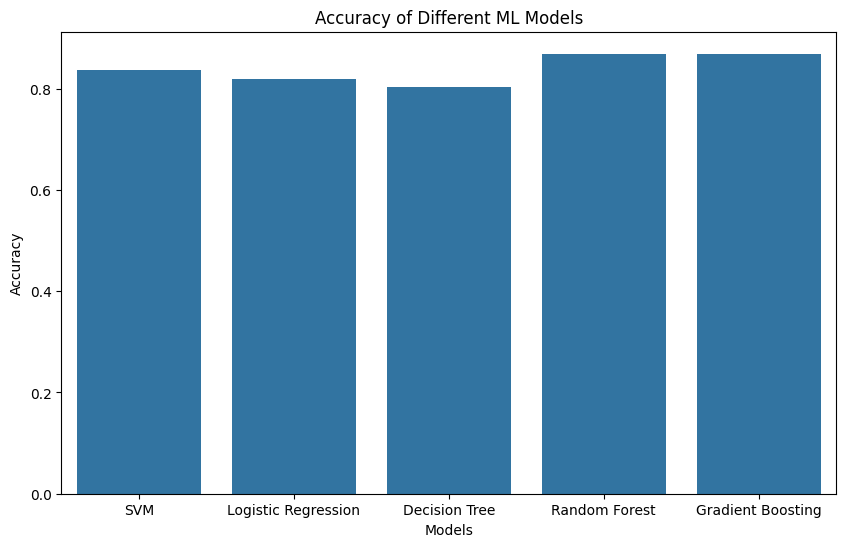

In [69]:
# Bar chart comparison of different ML models
models = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gbt)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title("Accuracy of Different ML Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

**DEFINING MODELS WITH HYPERPARAMETERS FOR TUNING**

Defining models with hyperparameters for tuning and perform hyperparameter tuning for each model using GridSearchCV.

In [70]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

Hyperparameter grids for each model

In [71]:
param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'Decision Tree': {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200],'max_depth': [None, 5, 10, 20]},
    'Gradient Boosting': {'n_estimators': [300], 'max_depth':[1], 'subsample':[0.8], 'max_features':[0.2], 'random_state':[42]}
}

In [72]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

 Perform hyperparameter tuning for each model

In [73]:
from sklearn.model_selection import GridSearchCV
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [74]:
# Evaluate the tuned models
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


SVM:
Accuracy: 0.819672131147541
Precision: 0.8181818181818182
Recall: 0.84375
F1 Score: 0.8307692307692308

Logistic Regression:
Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.8125
F1 Score: 0.8253968253968254

Decision Tree:
Accuracy: 0.8032786885245902
Precision: 0.8846153846153846
Recall: 0.71875
F1 Score: 0.7931034482758621

Random Forest:
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375

Gradient Boosting:
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1 Score: 0.870967741935484


**Select the best model based on performance**

In [75]:
accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in best_estimators.items()}
best_model_name = max(accuracies, key=accuracies.get)
best_model = best_estimators[best_model_name]
print(f"The best model is {best_model_name} with an accuracy of {accuracies[best_model_name]}")


The best model is Gradient Boosting with an accuracy of 0.8688524590163934


##USER BASED INTERFACE

 Use the best model to make predictions

In [76]:
new_data = {
    "age": float(input("Enter age: ")),
    "cp": int(input("Enter cp (chest pain type 0-3): ")),
    "trestbps": float(input("Enter resting blood pressure (mm Hg): ")),
    "chol": float(input("Enter serum cholestoral in mg/dl: ")),
    "thalach": float(input("Enter maximum heart rate achieved: ")),
    "oldpeak": float(input("Enter ST depression induced by exercise relative to rest: ")),
    "ca": int(input("Enter number of major vessels colored by flourosopy (0-3): "))
}

# Create DataFrame with feature names and scale the input data
input_df = pd.DataFrame([new_data])
X_scaled = scaler.transform(input_df[selected_features])
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Make predictions using the best model
prediction = best_model.predict(X_scaled_df)
print("Predicted probability of having a heart attack:", prediction)

Enter age: 50
Enter cp (chest pain type 0-3): 2
Enter resting blood pressure (mm Hg): 304
Enter serum cholestoral in mg/dl: 123
Enter maximum heart rate achieved: 80
Enter ST depression induced by exercise relative to rest: 2.77
Enter number of major vessels colored by flourosopy (0-3): 2
Predicted probability of having a heart attack: [0]


The project explores the prediction of heart attack likelihood using various machine learning models. The process begins with data exploration and cleaning, identifying significant features, and scaling them for improved model performance. Five models are trained and evaluated—SVM, Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting—with Gradient Boosting achieving the highest accuracy. Hyperparameter tuning is performed to optimize each model's performance. The project concludes with a user-friendly interface for predictions based on the best model. This work demonstrates the potential of machine learning in healthcare, offering insights into feature importance and model performance while laying the groundwork for further enhancements and real-world applications.